In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from fancyimpute import KNN, SimpleFill
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, auc

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
random.seed(136)

In [3]:
df = pd.read_csv('./dataset_complete.csv')

In [4]:
# remove high values
df[df.iloc[:, 1:-2] > 1] = np.nan

In [5]:
df.shape

(477, 39)

### imputation

In [6]:
imputation_types = 'knn' # 'knn', 'mean', 'median'
if imputation_types == 'mean':
    df_filled = SimpleFill().fit_transform(df.iloc[:, 1:-2])
    df.iloc[:, 1:-2] = df_filled
elif imputation_types == 'knn':
    df_filled = KNN().fit_transform(df.iloc[:, 1:-2])
    df.iloc[:, 1:-2] = df_filled

Imputing row 1/477 with 0 missing, elapsed time: 0.059
Imputing row 101/477 with 0 missing, elapsed time: 0.063
Imputing row 201/477 with 8 missing, elapsed time: 0.068
Imputing row 301/477 with 0 missing, elapsed time: 0.073
Imputing row 401/477 with 0 missing, elapsed time: 0.078


### Train test split

In [7]:
train, test = train_test_split(df)

In [8]:
# get predictors and target
train_x = np.array(train.iloc[:, 1:-2])
train_y = np.array(train.iloc[:, -2])
print("Number of training samples: {}".format(train_x.shape[0]))

Number of training samples: 357


In [9]:
# get predictors and target
test_x = np.array(test.iloc[:, 1:-2])
test_y = np.array(test.iloc[:, -2])
print("Number of testing samples: {}".format(test_x.shape[0]))

Number of testing samples: 120


### Naive bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gnb = GaussianNB()
clf = gnb.fit(train_x, train_y)
train_y_predicted = clf.predict(train_x)
test_y_predicted = clf.predict(test_x)

In [12]:
mean_squared_error(train_y, train_y_predicted)

801462.868347339

In [13]:
mean_squared_error(test_y, test_y_predicted)

962014.25

### linear regression - train - test splits

In [14]:
from sklearn.feature_selection import chi2, f_regression

In [15]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [16]:
# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Make predictions using the testing set
pred_train = regr.predict(train_x)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(train_y, pred_train))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_y, pred_train))

Coefficients: 
 [ -5179.40628865  -1481.28408009   2160.1110729   13237.15040679
   7208.05062561 -16483.18149984   5608.85950899  -6227.90241946
   3541.75173936  -1910.53038573  -5399.77517226   1309.03873278
   8999.79450257  -3496.29449176   2287.41369568  -6549.05684787
   1893.0635046   -1290.12186116  -6697.14519353   1408.53674814
  12466.08460914   4839.17072163   1797.69989056   2545.64701048
  -1181.52354469   4816.95789985   4011.30215605   -499.38309433
  15004.87588038 -16872.92460598  -2163.8565021   -5980.51402239
  -5352.10228886  -5742.89616763  13636.48857734  -5566.75279206]
Mean squared error: 518405.45
Variance score: 0.61


In [18]:
# Make predictions using the testing set
pred_test = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, pred_test))

Coefficients: 
 [ -5179.40628865  -1481.28408009   2160.1110729   13237.15040679
   7208.05062561 -16483.18149984   5608.85950899  -6227.90241946
   3541.75173936  -1910.53038573  -5399.77517226   1309.03873278
   8999.79450257  -3496.29449176   2287.41369568  -6549.05684787
   1893.0635046   -1290.12186116  -6697.14519353   1408.53674814
  12466.08460914   4839.17072163   1797.69989056   2545.64701048
  -1181.52354469   4816.95789985   4011.30215605   -499.38309433
  15004.87588038 -16872.92460598  -2163.8565021   -5980.51402239
  -5352.10228886  -5742.89616763  13636.48857734  -5566.75279206]
Mean squared error: 1536626.45
Variance score: -0.05


In [19]:
F, pval = f_regression(train_x, train_y)

In [20]:
pval

array([4.83500495e-01, 8.41780155e-33, 1.99954118e-24, 3.39158112e-40,
       4.84595985e-25, 1.15851909e-05, 4.22184641e-01, 1.47824164e-09,
       1.36736245e-33, 7.48601683e-26, 1.75691523e-38, 2.80092686e-21,
       2.29043309e-05, 5.69737702e-01, 1.47836387e-07, 9.62245735e-16,
       2.90218353e-05, 2.72828992e-02, 2.28541290e-08, 3.03100885e-18,
       2.77177355e-34, 2.99415260e-23, 1.70111932e-06, 4.47079451e-04,
       2.70817155e-10, 1.21866129e-06, 6.05748077e-02, 2.18678106e-06,
       4.68605699e-23, 8.19923037e-26, 4.13402919e-10, 1.97875236e-10,
       2.30221092e-07, 6.86957854e-02, 6.31613362e-02, 5.68082911e-02])

# quick neural net in keras

In [21]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
import keras
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
import math
import keras.backend as K

In [22]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [23]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=train_x.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(100, input_dim=train_x.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(50, input_dim=train_x.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(25, input_dim=train_x.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(15, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    adam = keras.optimizers.adam(lr=0.01, decay=0.0)
    model.compile(loss='mean_absolute_error', optimizer=adam)
    return model

In [24]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 500.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    print(lrate)
    return lrate

In [25]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.lr.append(step_decay(len(self.losses)))

In [26]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        decay = self.model.optimizer.decay
        iterations = self.model.optimizer.iterations
        lr_with_decay = lr / (1. + decay * K.cast(iterations, K.dtype(decay)))
        print(K.eval(lr_with_decay))

In [27]:
model = baseline_model()

In [28]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=100)
lh = LossHistory()
pl = MyCallback()
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [29]:
history = model.fit(x=train_x, 
                 y=train_y, 
                 batch_size=32,
                 validation_data=[test_x, test_y],
#                  steps_per_epoch=100,
#                  validation_steps=50,
                 callbacks = [lh, reduce_lr],
                 epochs=2000,
                 verbose=True)

Train on 357 samples, validate on 120 samples
Epoch 1/2000
357/357 [==============================] - 2s 6ms/step - loss: 3269.5786 - val_loss: 3301.7460
Epoch 2/2000
357/357 [==============================] - 0s 89us/step - loss: 3241.6996 - val_loss: 3253.0656
Epoch 3/2000
357/357 [==============================] - 0s 97us/step - loss: 3174.5377 - val_loss: 3157.1335
Epoch 4/2000
357/357 [==============================] - 0s 88us/step - loss: 3055.6576 - val_loss: 3003.5503
Epoch 5/2000
357/357 [==============================] - 0s 80us/step - loss: 2876.0711 - val_loss: 2785.1849
Epoch 6/2000
357/357 [==============================] - 0s 69us/step - loss: 2629.6721 - val_loss: 2496.4934
Epoch 7/2000
357/357 [==============================] - 0s 85us/step - loss: 2313.6551 - val_loss: 2134.8866
Epoch 8/2000
357/357 [==============================] - 0s 91us/step - loss: 1923.6864 - val_loss: 1702.4199
Epoch 9/2000
357/357 [==============================] - 0s 94us/step - loss: 1473.3

357/357 [==============================] - 0s 90us/step - loss: 699.2970 - val_loss: 744.2123
Epoch 77/2000
357/357 [==============================] - 0s 92us/step - loss: 699.3116 - val_loss: 741.8797
Epoch 78/2000
357/357 [==============================] - 0s 88us/step - loss: 699.1455 - val_loss: 741.7734
Epoch 79/2000
357/357 [==============================] - 0s 89us/step - loss: 698.9146 - val_loss: 742.3774
Epoch 80/2000
357/357 [==============================] - 0s 91us/step - loss: 707.1698 - val_loss: 748.6769
Epoch 81/2000
357/357 [==============================] - 0s 88us/step - loss: 698.6733 - val_loss: 741.3281
Epoch 82/2000
357/357 [==============================] - 0s 87us/step - loss: 697.9314 - val_loss: 741.1772
Epoch 83/2000
357/357 [==============================] - 0s 102us/step - loss: 697.1773 - val_loss: 741.2212
Epoch 84/2000
357/357 [==============================] - 0s 88us/step - loss: 700.2030 - val_loss: 740.3652
Epoch 85/2000
357/357 [==================

357/357 [==============================] - 0s 84us/step - loss: 685.2390 - val_loss: 727.6793
Epoch 152/2000
357/357 [==============================] - 0s 86us/step - loss: 684.1367 - val_loss: 726.8980
Epoch 153/2000
357/357 [==============================] - 0s 87us/step - loss: 682.2255 - val_loss: 725.6002
Epoch 154/2000
357/357 [==============================] - 0s 84us/step - loss: 682.3701 - val_loss: 725.7855
Epoch 155/2000
357/357 [==============================] - 0s 98us/step - loss: 681.6642 - val_loss: 725.2461
Epoch 156/2000
357/357 [==============================] - 0s 87us/step - loss: 681.7750 - val_loss: 724.5602
Epoch 157/2000
357/357 [==============================] - 0s 79us/step - loss: 680.2541 - val_loss: 724.3419
Epoch 158/2000
357/357 [==============================] - 0s 91us/step - loss: 680.2962 - val_loss: 725.2908
Epoch 159/2000
357/357 [==============================] - 0s 96us/step - loss: 680.5300 - val_loss: 724.0516
Epoch 160/2000
357/357 [==========

357/357 [==============================] - 0s 92us/step - loss: 660.3715 - val_loss: 708.9101
Epoch 227/2000
357/357 [==============================] - 0s 77us/step - loss: 665.2915 - val_loss: 709.8832
Epoch 228/2000
357/357 [==============================] - 0s 91us/step - loss: 660.8477 - val_loss: 709.8534
Epoch 229/2000
357/357 [==============================] - 0s 88us/step - loss: 661.1714 - val_loss: 707.5543
Epoch 230/2000
357/357 [==============================] - 0s 87us/step - loss: 659.9953 - val_loss: 714.6651
Epoch 231/2000
357/357 [==============================] - 0s 90us/step - loss: 662.9059 - val_loss: 710.6882
Epoch 232/2000
357/357 [==============================] - 0s 85us/step - loss: 658.1214 - val_loss: 707.5135
Epoch 233/2000
357/357 [==============================] - 0s 85us/step - loss: 660.6096 - val_loss: 707.8037
Epoch 234/2000
357/357 [==============================] - 0s 89us/step - loss: 658.2427 - val_loss: 706.8069
Epoch 235/2000
357/357 [==========

357/357 [==============================] - 0s 95us/step - loss: 639.2236 - val_loss: 696.8365
Epoch 302/2000
357/357 [==============================] - 0s 89us/step - loss: 638.1334 - val_loss: 696.0022
Epoch 303/2000
357/357 [==============================] - 0s 95us/step - loss: 640.1698 - val_loss: 696.1452
Epoch 304/2000
357/357 [==============================] - 0s 94us/step - loss: 638.5362 - val_loss: 701.7462
Epoch 305/2000
357/357 [==============================] - 0s 88us/step - loss: 641.9782 - val_loss: 699.6113
Epoch 306/2000
357/357 [==============================] - 0s 94us/step - loss: 637.1870 - val_loss: 695.3643
Epoch 307/2000
357/357 [==============================] - 0s 94us/step - loss: 642.6565 - val_loss: 695.7479
Epoch 308/2000
357/357 [==============================] - 0s 91us/step - loss: 638.9166 - val_loss: 696.9422
Epoch 309/2000
357/357 [==============================] - 0s 92us/step - loss: 638.6620 - val_loss: 694.9514
Epoch 310/2000
357/357 [==========

357/357 [==============================] - 0s 90us/step - loss: 628.3449 - val_loss: 687.1242
Epoch 377/2000
357/357 [==============================] - 0s 95us/step - loss: 628.8935 - val_loss: 688.4215
Epoch 378/2000
357/357 [==============================] - 0s 100us/step - loss: 628.0156 - val_loss: 690.2625
Epoch 379/2000
357/357 [==============================] - 0s 97us/step - loss: 630.3379 - val_loss: 694.0544
Epoch 380/2000
357/357 [==============================] - 0s 91us/step - loss: 630.0967 - val_loss: 686.7769
Epoch 381/2000
357/357 [==============================] - 0s 82us/step - loss: 627.7177 - val_loss: 689.9085
Epoch 382/2000
357/357 [==============================] - 0s 77us/step - loss: 627.6726 - val_loss: 691.2358
Epoch 383/2000
357/357 [==============================] - 0s 77us/step - loss: 628.4673 - val_loss: 693.9135
Epoch 384/2000
357/357 [==============================] - 0s 83us/step - loss: 628.7846 - val_loss: 690.3995
Epoch 385/2000
357/357 [=========

357/357 [==============================] - 0s 83us/step - loss: 620.0542 - val_loss: 686.2869
Epoch 452/2000
357/357 [==============================] - 0s 78us/step - loss: 627.4046 - val_loss: 680.4283
Epoch 453/2000
357/357 [==============================] - 0s 71us/step - loss: 618.8317 - val_loss: 690.5768
Epoch 454/2000
357/357 [==============================] - 0s 78us/step - loss: 621.6327 - val_loss: 685.6333
Epoch 455/2000
357/357 [==============================] - 0s 74us/step - loss: 619.6049 - val_loss: 686.7942
Epoch 456/2000
357/357 [==============================] - 0s 91us/step - loss: 617.9386 - val_loss: 680.0243
Epoch 457/2000
357/357 [==============================] - 0s 87us/step - loss: 619.8779 - val_loss: 680.7053
Epoch 458/2000
357/357 [==============================] - 0s 87us/step - loss: 619.3614 - val_loss: 684.0785
Epoch 459/2000
357/357 [==============================] - 0s 90us/step - loss: 618.9606 - val_loss: 683.4697
Epoch 460/2000
357/357 [==========

357/357 [==============================] - 0s 87us/step - loss: 612.0905 - val_loss: 681.2405
Epoch 527/2000
357/357 [==============================] - 0s 81us/step - loss: 612.9242 - val_loss: 678.9593
Epoch 528/2000
357/357 [==============================] - 0s 87us/step - loss: 612.4570 - val_loss: 671.4024
Epoch 529/2000
357/357 [==============================] - 0s 93us/step - loss: 611.6629 - val_loss: 674.8286
Epoch 530/2000
357/357 [==============================] - 0s 87us/step - loss: 610.9906 - val_loss: 676.8463
Epoch 531/2000
357/357 [==============================] - 0s 88us/step - loss: 611.0848 - val_loss: 673.4911
Epoch 532/2000
357/357 [==============================] - 0s 88us/step - loss: 610.6175 - val_loss: 678.1275
Epoch 533/2000
357/357 [==============================] - 0s 84us/step - loss: 613.0678 - val_loss: 673.1427
Epoch 534/2000
357/357 [==============================] - 0s 87us/step - loss: 611.1192 - val_loss: 676.0704
Epoch 535/2000
357/357 [==========

357/357 [==============================] - 0s 91us/step - loss: 604.1380 - val_loss: 668.7765
Epoch 602/2000
357/357 [==============================] - 0s 95us/step - loss: 602.9894 - val_loss: 670.3553
Epoch 603/2000
357/357 [==============================] - 0s 86us/step - loss: 602.4938 - val_loss: 668.4486
Epoch 604/2000
357/357 [==============================] - 0s 94us/step - loss: 603.6242 - val_loss: 667.1823
Epoch 605/2000
357/357 [==============================] - 0s 93us/step - loss: 603.3783 - val_loss: 665.1351
Epoch 606/2000
357/357 [==============================] - 0s 97us/step - loss: 603.1209 - val_loss: 674.1530
Epoch 607/2000
357/357 [==============================] - 0s 92us/step - loss: 606.4514 - val_loss: 666.0169
Epoch 608/2000
357/357 [==============================] - 0s 95us/step - loss: 602.2332 - val_loss: 673.0646
Epoch 609/2000
357/357 [==============================] - 0s 95us/step - loss: 602.8548 - val_loss: 665.4720
Epoch 610/2000
357/357 [==========

357/357 [==============================] - 0s 88us/step - loss: 597.8670 - val_loss: 661.7972
Epoch 677/2000
357/357 [==============================] - 0s 90us/step - loss: 595.6718 - val_loss: 669.5693
Epoch 678/2000
357/357 [==============================] - 0s 90us/step - loss: 598.3221 - val_loss: 661.6090
Epoch 679/2000
357/357 [==============================] - 0s 94us/step - loss: 595.7899 - val_loss: 662.1447
Epoch 680/2000
357/357 [==============================] - 0s 73us/step - loss: 595.3835 - val_loss: 663.6341
Epoch 681/2000
357/357 [==============================] - 0s 82us/step - loss: 595.4226 - val_loss: 662.4153
Epoch 682/2000
357/357 [==============================] - 0s 70us/step - loss: 596.9956 - val_loss: 657.8330
Epoch 683/2000
357/357 [==============================] - 0s 83us/step - loss: 596.1017 - val_loss: 662.8509
Epoch 684/2000
357/357 [==============================] - 0s 86us/step - loss: 599.2206 - val_loss: 657.6387
Epoch 685/2000
357/357 [==========

357/357 [==============================] - 0s 79us/step - loss: 593.5680 - val_loss: 651.7471
Epoch 752/2000
357/357 [==============================] - 0s 94us/step - loss: 591.3551 - val_loss: 657.9856
Epoch 753/2000
357/357 [==============================] - 0s 99us/step - loss: 590.1423 - val_loss: 653.8999
Epoch 754/2000
357/357 [==============================] - 0s 101us/step - loss: 590.7117 - val_loss: 652.8970
Epoch 755/2000
357/357 [==============================] - 0s 93us/step - loss: 590.9150 - val_loss: 652.9295
Epoch 756/2000
357/357 [==============================] - 0s 90us/step - loss: 591.3520 - val_loss: 653.8283
Epoch 757/2000
357/357 [==============================] - 0s 94us/step - loss: 591.0610 - val_loss: 651.8546
Epoch 758/2000
357/357 [==============================] - 0s 80us/step - loss: 593.7405 - val_loss: 654.2858
Epoch 759/2000
357/357 [==============================] - 0s 89us/step - loss: 590.8895 - val_loss: 655.9545
Epoch 760/2000
357/357 [=========

357/357 [==============================] - 0s 82us/step - loss: 586.2857 - val_loss: 651.2478
Epoch 827/2000
357/357 [==============================] - 0s 85us/step - loss: 590.3257 - val_loss: 655.2780
Epoch 828/2000
357/357 [==============================] - 0s 83us/step - loss: 586.8057 - val_loss: 648.0040
Epoch 829/2000
357/357 [==============================] - 0s 87us/step - loss: 587.6208 - val_loss: 649.2540
Epoch 830/2000
357/357 [==============================] - 0s 89us/step - loss: 585.9740 - val_loss: 652.6944
Epoch 831/2000
357/357 [==============================] - 0s 82us/step - loss: 593.5414 - val_loss: 656.7306
Epoch 832/2000
357/357 [==============================] - 0s 79us/step - loss: 589.2874 - val_loss: 647.5274
Epoch 833/2000
357/357 [==============================] - 0s 86us/step - loss: 588.9462 - val_loss: 658.7201
Epoch 834/2000
357/357 [==============================] - 0s 82us/step - loss: 589.6201 - val_loss: 649.5113
Epoch 835/2000
357/357 [==========

357/357 [==============================] - 0s 89us/step - loss: 587.1207 - val_loss: 647.5853
Epoch 902/2000
357/357 [==============================] - 0s 80us/step - loss: 584.8986 - val_loss: 649.5683
Epoch 903/2000
357/357 [==============================] - 0s 83us/step - loss: 586.0655 - val_loss: 648.2880
Epoch 904/2000
357/357 [==============================] - 0s 92us/step - loss: 582.7588 - val_loss: 643.5203
Epoch 905/2000
357/357 [==============================] - 0s 89us/step - loss: 583.7694 - val_loss: 648.6209
Epoch 906/2000
357/357 [==============================] - 0s 78us/step - loss: 582.7585 - val_loss: 645.0957
Epoch 907/2000
357/357 [==============================] - 0s 84us/step - loss: 585.8140 - val_loss: 644.2797
Epoch 908/2000
357/357 [==============================] - 0s 95us/step - loss: 586.2056 - val_loss: 648.2528
Epoch 909/2000
357/357 [==============================] - 0s 80us/step - loss: 581.6383 - val_loss: 642.8203
Epoch 910/2000
357/357 [==========

357/357 [==============================] - 0s 87us/step - loss: 580.9040 - val_loss: 644.4671
Epoch 977/2000
357/357 [==============================] - 0s 93us/step - loss: 583.6232 - val_loss: 648.8731
Epoch 978/2000
357/357 [==============================] - 0s 97us/step - loss: 583.6025 - val_loss: 645.7426
Epoch 979/2000
357/357 [==============================] - 0s 113us/step - loss: 581.2368 - val_loss: 643.2984
Epoch 980/2000
357/357 [==============================] - 0s 92us/step - loss: 582.2279 - val_loss: 642.7044
Epoch 981/2000
357/357 [==============================] - 0s 92us/step - loss: 580.8015 - val_loss: 645.2542
Epoch 982/2000
357/357 [==============================] - 0s 91us/step - loss: 582.0371 - val_loss: 647.7829
Epoch 983/2000
357/357 [==============================] - 0s 92us/step - loss: 583.9099 - val_loss: 641.2288
Epoch 984/2000
357/357 [==============================] - 0s 92us/step - loss: 582.2807 - val_loss: 644.8521
Epoch 985/2000
357/357 [=========

Epoch 1051/2000
357/357 [==============================] - 0s 89us/step - loss: 579.5043 - val_loss: 641.7685
Epoch 1052/2000
357/357 [==============================] - 0s 94us/step - loss: 579.3798 - val_loss: 644.7322
Epoch 1053/2000
357/357 [==============================] - 0s 102us/step - loss: 582.4983 - val_loss: 642.6530
Epoch 1054/2000
357/357 [==============================] - 0s 97us/step - loss: 579.4951 - val_loss: 642.1656
Epoch 1055/2000
357/357 [==============================] - 0s 91us/step - loss: 578.6968 - val_loss: 641.5998
Epoch 1056/2000
357/357 [==============================] - 0s 91us/step - loss: 580.1207 - val_loss: 641.3884
Epoch 1057/2000
357/357 [==============================] - 0s 92us/step - loss: 582.0070 - val_loss: 637.1501
Epoch 1058/2000
357/357 [==============================] - 0s 88us/step - loss: 580.9894 - val_loss: 645.2441
Epoch 1059/2000
357/357 [==============================] - 0s 93us/step - loss: 580.6761 - val_loss: 640.3503
Epoch 106

357/357 [==============================] - 0s 93us/step - loss: 577.7266 - val_loss: 643.7886
Epoch 1126/2000
357/357 [==============================] - 0s 88us/step - loss: 577.3356 - val_loss: 637.4281
Epoch 1127/2000
357/357 [==============================] - 0s 96us/step - loss: 578.6710 - val_loss: 642.4214
Epoch 1128/2000
357/357 [==============================] - 0s 89us/step - loss: 587.6194 - val_loss: 651.9407
Epoch 1129/2000
357/357 [==============================] - 0s 88us/step - loss: 585.3839 - val_loss: 635.4025
Epoch 1130/2000
357/357 [==============================] - 0s 86us/step - loss: 582.9358 - val_loss: 646.0229
Epoch 1131/2000
357/357 [==============================] - 0s 96us/step - loss: 578.9132 - val_loss: 639.0635
Epoch 1132/2000
357/357 [==============================] - 0s 90us/step - loss: 578.5634 - val_loss: 644.6969
Epoch 1133/2000
357/357 [==============================] - 0s 90us/step - loss: 577.9665 - val_loss: 636.6278
Epoch 1134/2000
357/357 [=

357/357 [==============================] - 0s 102us/step - loss: 578.0945 - val_loss: 637.5172
Epoch 1200/2000
357/357 [==============================] - 0s 94us/step - loss: 578.6997 - val_loss: 641.1300
Epoch 1201/2000
357/357 [==============================] - 0s 94us/step - loss: 577.7192 - val_loss: 640.7963
Epoch 1202/2000
357/357 [==============================] - 0s 94us/step - loss: 580.8516 - val_loss: 637.5750
Epoch 1203/2000
357/357 [==============================] - 0s 96us/step - loss: 579.1129 - val_loss: 642.4581
Epoch 1204/2000
357/357 [==============================] - 0s 89us/step - loss: 576.9965 - val_loss: 637.5136
Epoch 1205/2000
357/357 [==============================] - 0s 87us/step - loss: 575.9270 - val_loss: 641.9712
Epoch 1206/2000
357/357 [==============================] - 0s 98us/step - loss: 580.2250 - val_loss: 635.9315
Epoch 1207/2000
357/357 [==============================] - 0s 88us/step - loss: 578.1101 - val_loss: 641.3570
Epoch 1208/2000
357/357 [

357/357 [==============================] - 0s 94us/step - loss: 580.9606 - val_loss: 636.8025
Epoch 1274/2000
357/357 [==============================] - 0s 83us/step - loss: 575.1209 - val_loss: 645.4176
Epoch 1275/2000
357/357 [==============================] - 0s 95us/step - loss: 578.3066 - val_loss: 644.3084
Epoch 1276/2000
357/357 [==============================] - 0s 86us/step - loss: 574.4175 - val_loss: 635.7690
Epoch 1277/2000
357/357 [==============================] - 0s 83us/step - loss: 576.3259 - val_loss: 640.8289
Epoch 1278/2000
357/357 [==============================] - 0s 88us/step - loss: 575.4254 - val_loss: 639.2548
Epoch 1279/2000
357/357 [==============================] - 0s 93us/step - loss: 577.4068 - val_loss: 635.8145
Epoch 1280/2000
357/357 [==============================] - 0s 82us/step - loss: 578.3814 - val_loss: 644.9157
Epoch 1281/2000
357/357 [==============================] - 0s 71us/step - loss: 576.6012 - val_loss: 637.5777
Epoch 1282/2000
357/357 [=

357/357 [==============================] - 0s 91us/step - loss: 573.6586 - val_loss: 635.9930
Epoch 1348/2000
357/357 [==============================] - 0s 87us/step - loss: 574.4532 - val_loss: 637.4809
Epoch 1349/2000
357/357 [==============================] - 0s 96us/step - loss: 574.0348 - val_loss: 638.2071
Epoch 1350/2000
357/357 [==============================] - 0s 88us/step - loss: 574.9090 - val_loss: 637.8196
Epoch 1351/2000
357/357 [==============================] - 0s 86us/step - loss: 573.9846 - val_loss: 635.5276
Epoch 1352/2000
357/357 [==============================] - 0s 87us/step - loss: 574.7897 - val_loss: 639.2365
Epoch 1353/2000
357/357 [==============================] - 0s 95us/step - loss: 575.4618 - val_loss: 640.1149
Epoch 1354/2000
357/357 [==============================] - 0s 96us/step - loss: 574.8037 - val_loss: 641.5194
Epoch 1355/2000
357/357 [==============================] - 0s 84us/step - loss: 575.4118 - val_loss: 636.4830
Epoch 1356/2000
357/357 [=

357/357 [==============================] - 0s 90us/step - loss: 575.4225 - val_loss: 643.6955
Epoch 1422/2000
357/357 [==============================] - 0s 91us/step - loss: 574.8915 - val_loss: 634.3520
Epoch 1423/2000
357/357 [==============================] - 0s 77us/step - loss: 573.8859 - val_loss: 635.9783
Epoch 1424/2000
357/357 [==============================] - 0s 86us/step - loss: 573.4955 - val_loss: 638.3729
Epoch 1425/2000
357/357 [==============================] - 0s 91us/step - loss: 577.5184 - val_loss: 643.6866
Epoch 1426/2000
357/357 [==============================] - 0s 88us/step - loss: 575.0126 - val_loss: 636.9631
Epoch 1427/2000
357/357 [==============================] - 0s 87us/step - loss: 576.9577 - val_loss: 642.5756
Epoch 1428/2000
357/357 [==============================] - 0s 95us/step - loss: 573.3195 - val_loss: 634.5264
Epoch 1429/2000
357/357 [==============================] - 0s 100us/step - loss: 574.1035 - val_loss: 640.3588
Epoch 1430/2000
357/357 [

357/357 [==============================] - 0s 89us/step - loss: 573.6536 - val_loss: 636.2150
Epoch 1496/2000
357/357 [==============================] - 0s 77us/step - loss: 576.5633 - val_loss: 640.0947
Epoch 1497/2000
357/357 [==============================] - 0s 74us/step - loss: 571.6359 - val_loss: 634.5098
Epoch 1498/2000
357/357 [==============================] - 0s 86us/step - loss: 575.0093 - val_loss: 636.3227
Epoch 1499/2000
357/357 [==============================] - 0s 95us/step - loss: 572.4884 - val_loss: 638.2225
Epoch 1500/2000
357/357 [==============================] - 0s 94us/step - loss: 578.9520 - val_loss: 644.4841
Epoch 1501/2000
357/357 [==============================] - 0s 82us/step - loss: 573.3408 - val_loss: 634.9896
Epoch 1502/2000
357/357 [==============================] - 0s 87us/step - loss: 575.1205 - val_loss: 639.6177
Epoch 1503/2000
357/357 [==============================] - 0s 77us/step - loss: 573.5685 - val_loss: 636.4259
Epoch 1504/2000
357/357 [=

357/357 [==============================] - 0s 95us/step - loss: 571.9011 - val_loss: 634.4495
Epoch 1570/2000
357/357 [==============================] - 0s 95us/step - loss: 572.2986 - val_loss: 635.5574
Epoch 1571/2000
357/357 [==============================] - 0s 98us/step - loss: 571.8054 - val_loss: 640.1116
Epoch 1572/2000
357/357 [==============================] - 0s 98us/step - loss: 572.1906 - val_loss: 638.6957
Epoch 1573/2000
357/357 [==============================] - 0s 90us/step - loss: 573.4476 - val_loss: 637.5232
Epoch 1574/2000
357/357 [==============================] - 0s 81us/step - loss: 571.9669 - val_loss: 644.8699
Epoch 1575/2000
357/357 [==============================] - 0s 93us/step - loss: 575.9500 - val_loss: 640.2321
Epoch 1576/2000
357/357 [==============================] - 0s 94us/step - loss: 574.2282 - val_loss: 636.9768
Epoch 1577/2000
357/357 [==============================] - 0s 91us/step - loss: 575.9336 - val_loss: 642.3184
Epoch 1578/2000
357/357 [=

357/357 [==============================] - 0s 93us/step - loss: 570.0401 - val_loss: 635.7089
Epoch 1644/2000
357/357 [==============================] - 0s 89us/step - loss: 570.5614 - val_loss: 638.5686
Epoch 1645/2000
357/357 [==============================] - 0s 100us/step - loss: 570.6824 - val_loss: 638.7190
Epoch 1646/2000
357/357 [==============================] - 0s 84us/step - loss: 571.2347 - val_loss: 637.7498
Epoch 1647/2000
357/357 [==============================] - 0s 85us/step - loss: 571.0015 - val_loss: 635.8375
Epoch 1648/2000
357/357 [==============================] - 0s 92us/step - loss: 570.6678 - val_loss: 634.1486
Epoch 1649/2000
357/357 [==============================] - 0s 85us/step - loss: 570.6984 - val_loss: 636.7113
Epoch 1650/2000
357/357 [==============================] - 0s 73us/step - loss: 573.8713 - val_loss: 639.8472
Epoch 1651/2000
357/357 [==============================] - 0s 76us/step - loss: 571.1987 - val_loss: 638.5008
Epoch 1652/2000
357/357 [

357/357 [==============================] - 0s 97us/step - loss: 569.3023 - val_loss: 642.5011
Epoch 1718/2000
357/357 [==============================] - 0s 82us/step - loss: 572.3690 - val_loss: 639.8509
Epoch 1719/2000
357/357 [==============================] - 0s 83us/step - loss: 571.6720 - val_loss: 639.9421
Epoch 1720/2000
357/357 [==============================] - 0s 90us/step - loss: 570.8844 - val_loss: 636.1964
Epoch 1721/2000
357/357 [==============================] - 0s 97us/step - loss: 572.6506 - val_loss: 644.3215
Epoch 1722/2000
357/357 [==============================] - 0s 93us/step - loss: 571.9256 - val_loss: 631.4262
Epoch 1723/2000
357/357 [==============================] - 0s 97us/step - loss: 571.2046 - val_loss: 637.4232
Epoch 1724/2000
357/357 [==============================] - 0s 82us/step - loss: 571.7675 - val_loss: 645.2869
Epoch 1725/2000
357/357 [==============================] - 0s 88us/step - loss: 571.6461 - val_loss: 638.9418
Epoch 1726/2000
357/357 [=

357/357 [==============================] - 0s 87us/step - loss: 570.1122 - val_loss: 635.4917
Epoch 1792/2000
357/357 [==============================] - 0s 80us/step - loss: 569.6218 - val_loss: 635.7191
Epoch 1793/2000
357/357 [==============================] - 0s 96us/step - loss: 569.5114 - val_loss: 637.0846
Epoch 1794/2000
357/357 [==============================] - 0s 84us/step - loss: 569.7271 - val_loss: 637.0788
Epoch 1795/2000
357/357 [==============================] - 0s 94us/step - loss: 569.5281 - val_loss: 637.1866
Epoch 1796/2000
357/357 [==============================] - 0s 93us/step - loss: 569.6836 - val_loss: 636.7373
Epoch 1797/2000
357/357 [==============================] - 0s 89us/step - loss: 569.7447 - val_loss: 635.1720
Epoch 1798/2000
357/357 [==============================] - 0s 94us/step - loss: 569.6999 - val_loss: 636.0755
Epoch 1799/2000
357/357 [==============================] - 0s 94us/step - loss: 569.9691 - val_loss: 639.7743
Epoch 1800/2000
357/357 [=

357/357 [==============================] - 0s 90us/step - loss: 569.4104 - val_loss: 636.8422
Epoch 1866/2000
357/357 [==============================] - 0s 94us/step - loss: 569.2954 - val_loss: 636.5067
Epoch 1867/2000
357/357 [==============================] - 0s 92us/step - loss: 569.4288 - val_loss: 636.5556
Epoch 1868/2000
357/357 [==============================] - 0s 100us/step - loss: 569.4190 - val_loss: 637.8500
Epoch 1869/2000
357/357 [==============================] - 0s 92us/step - loss: 569.6722 - val_loss: 638.2552
Epoch 1870/2000
357/357 [==============================] - 0s 88us/step - loss: 569.7292 - val_loss: 635.1746
Epoch 1871/2000
357/357 [==============================] - 0s 94us/step - loss: 569.6487 - val_loss: 636.0782
Epoch 1872/2000
357/357 [==============================] - 0s 80us/step - loss: 569.7239 - val_loss: 634.8485
Epoch 1873/2000
357/357 [==============================] - 0s 89us/step - loss: 569.3549 - val_loss: 635.5788
Epoch 1874/2000
357/357 [

357/357 [==============================] - 0s 89us/step - loss: 569.2065 - val_loss: 636.5946
Epoch 1940/2000
357/357 [==============================] - 0s 85us/step - loss: 569.0876 - val_loss: 636.1159
Epoch 1941/2000
357/357 [==============================] - 0s 90us/step - loss: 569.1862 - val_loss: 636.1808
Epoch 1942/2000
357/357 [==============================] - 0s 84us/step - loss: 569.0947 - val_loss: 635.6661
Epoch 1943/2000
357/357 [==============================] - 0s 76us/step - loss: 569.1064 - val_loss: 635.2757
Epoch 1944/2000
357/357 [==============================] - 0s 87us/step - loss: 569.6180 - val_loss: 634.8760
Epoch 1945/2000
357/357 [==============================] - 0s 96us/step - loss: 569.2597 - val_loss: 635.9476
Epoch 1946/2000
357/357 [==============================] - 0s 96us/step - loss: 569.2739 - val_loss: 635.9345
Epoch 1947/2000
357/357 [==============================] - 0s 82us/step - loss: 569.1968 - val_loss: 636.6721
Epoch 1948/2000
357/357 [=

In [30]:
logs = history.history

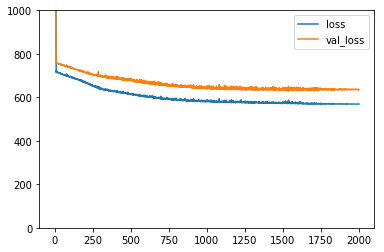

In [31]:
plt.plot(logs['loss'])
plt.plot(logs['val_loss'])
plt.ylim([0, 1e3])
plt.legend(['loss', 'val_loss'])
plt.show()

In [32]:
pred_test_x = model.predict(test_x)

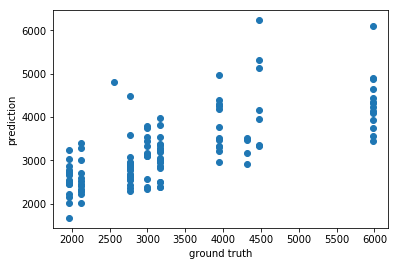

In [33]:
plt.scatter(test_y, pred_test_x)
plt.ylabel('prediction')
plt.xlabel('ground truth')
plt.show()